In [1]:
# -*- coding: utf-8 -*-
"""Example for R-graph
"""
# Author: Michiel Bongaerts (but not author of the R-graph method)
# License: BSD 2 clause


from __future__ import division
from __future__ import print_function

import os
import sys

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

from pyod.models.rgraph import RGraph
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

import seaborn as sns
import matplotlib.pyplot as plt

0/100
25/100
50/100
75/100
Test block 0/6
0/120
25/120
50/120
75/120
100/120
Test block 1/6
0/120
25/120
50/120
75/120
100/120
Test block 2/6
0/120
25/120
50/120
75/120
100/120
Test block 3/6
0/120
25/120
50/120
75/120
100/120
Test block 4/6
0/120
25/120
50/120
75/120
100/120
Test block 5/6
Test block 0/6
0/120
25/120
50/120
75/120
100/120
Test block 1/6
0/120
25/120
50/120
75/120
100/120
Test block 2/6
0/120
25/120
50/120
75/120
100/120
Test block 3/6
0/120
25/120
50/120
75/120
100/120
Test block 4/6
0/120
25/120
50/120
75/120
100/120
Test block 5/6

On Training Data:
R-graph ROC:1.0, precision @ rank n:1.0

On Test Data:
R-graph ROC:1.0, precision @ rank n:1.0


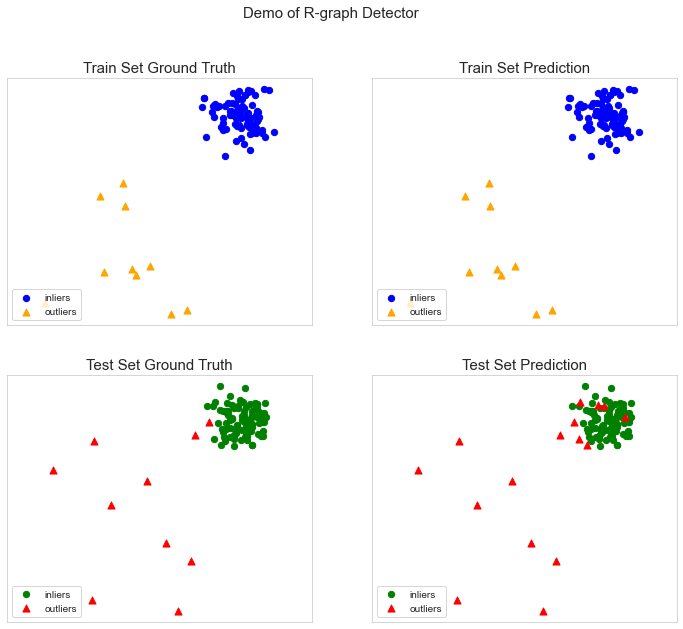

In [2]:
contamination = 0.1  # percentage of outliers
n_train = 100  # number of training points
n_test = 100  # number of testing points

# Generate sample data
X_train, X_test, y_train, y_test = generate_data(
    n_train=n_train,
    n_test=n_test,
    n_features=75,
    contamination=contamination,
    behaviour="new",
    random_state=42,
)

# train R-graph detector
clf_name = 'R-graph'
clf = RGraph(n_nonzero=100, transition_steps=20, gamma=50, gamma_nz=False,
             tau=1, preprocessing=True, active_support=False,
             blocksize_test_data=20,
             algorithm='lasso_lars', maxiter=100, verbose=1)

clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

# # visualize the results
visualize(clf_name, X_train[:, 0:2], y_train, X_test[:, 0:2], y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=True)


C:\Users\yzhao\anaconda3\envs\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of outlier scores')

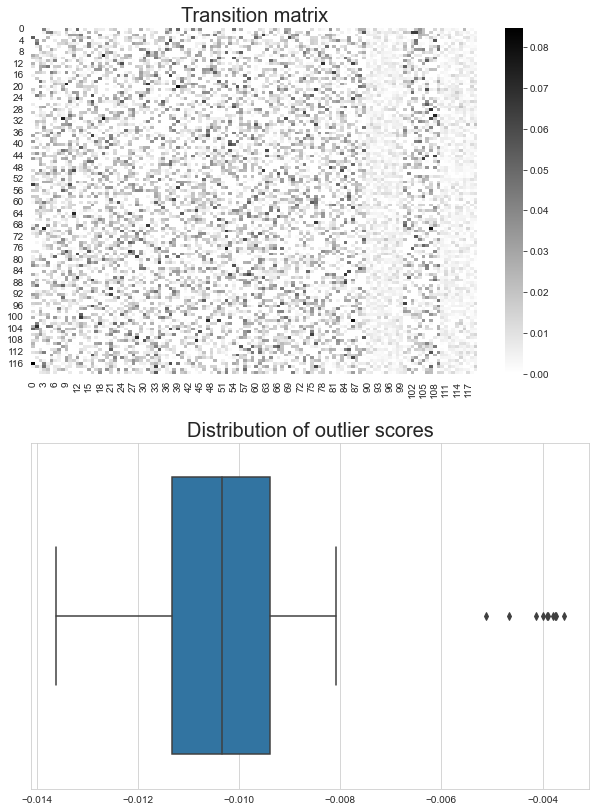

In [3]:
fig = plt.figure(figsize=(10, 14))
ax = fig.add_subplot(2, 1, 1)
sns.heatmap(clf.transition_matrix_, ax=ax, cmap='binary')
ax.set_title('Transition matrix', fontsize=20)

ax = fig.add_subplot(2, 1, 2)
sns.boxplot(clf.decision_scores_)
ax.set_title('Distribution of outlier scores', fontsize=20)